In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

In [28]:
#1. Download price data for specific stocks
tickers=["AAPL",'MSFT', 'SPY', 'TLT']
data=yf.download(tickers,start="2020-01-01",end="2024-12-31",group_by=tickers,auto_adjust=False)
adj_close_data=yf.download(tickers,start="2020-01-01",end="2024-12-31",auto_adjust=False)[["Adj Close"]]
adjclosecolm=adj_close_data['Adj Close']
returns=adjclosecolm.pct_change().dropna()
returns=adjclosecolm.pct_change().dropna()
returns=adjclosecolm.pct_change().dropna()
returns=adjclosecolm.pct_change().dropna()
returns=adjclosecolm.pct_change().dropna()
returns=adjclosecolm.pct_change().dropna()
#2. Assume portfolio fractions in each asset  (Must add upto 1)
weights=np.array([0.3,0.3,0.2,0.2])
#3. Calculate dailyreturns on portfolio
portfolioreturns=returns.dot(weights)
#4. set confidence limits 95% and 99% for VaR
alfa1=0.05
alfa2=0.01
#5. Calculate VaR
# Method 1: calculate VaR using quantiles calculated from historical data 
var1=-portfolioreturns.quantile(alfa1)
var2=-portfolioreturns.quantile(alfa2)
print(f"VaR at 95 % confidence from historical data: {-var1:.2%}")
print(f"VaR at 99 % confidence from historical data: {-var2:.2%}")

#Method 2: calculate VaR by assuming that portfolio returns are normally distributed
#calculate mean and SD of portfolio returns
mu=np.mean(portfolioreturns)
sig=np.std(portfolioreturns)
#calculate z-score for 95% and 99% confidence limits
z1=norm.ppf(alfa1)
z2=norm.ppf(alfa2)
var1b=-(mu+z1*sig)
var2b=-(mu+z2*sig)

print(f"VaR at 95 % confidence from normal assumption: {-var1b:.2%}")
print(f"VaR at 99 % confidence from normal assumption: {-var2b:.2%}")

#Method 3: Calculate VaR using random values generated using Monte-Carlo simulation
mu=np.mean(portfolioreturns)
sig=np.std(portfolioreturns)
n_sim=1000 #3000 # increase it from 100-100000000: 
#VaR for 100 nsim is similar to other two methods, 
#VaR from 1000000000 nsim is a converged value higher than other two methods
simulatedreturns=np.random.normal(mu,sig,n_sim)
var1c=-np.percentile(simulatedreturns,alfa1)
var2c=-np.percentile(simulatedreturns,alfa2)
print(f"VaR at 95 % confidence from MonteCarlo simulations: {-var1c:.2%}")
print(f"VaR at 99 % confidence from MonteCarlo simulations: {-var2c:.2%}")
print("Comment: MonteCarlo simulations predict greater VaR than historical data or normal assumption")
print("Reason: SD is estimated from historical data containing Covid spike, which increases volatility of simulated data.")
print("To avoid this, the VaR from MonteCarlo are recalculated below using mean and SD calculated from historical data without Covid spike.")
#Method 3b: Calculate VaR using random values generated using Monte-Carlo simulation
mu2=np.mean(portfolioreturns)
sig2=np.std(portfolioreturns.loc["2024-01-01":"2024-12-01"])
n_sim=1000 #3000 # increase it from 100-100000000: 
#VaR for 100 nsim is similar to other two methods, 
#VaR from 1000000000 nsim is a converged value higher than other two methods
simulatedreturns2=np.random.normal(mu2,sig2,n_sim)
var1c2=-np.percentile(simulatedreturns2,alfa1)
var2c2=-np.percentile(simulatedreturns2,alfa2)
print(f"VaR at 95 % confidence from MonteCarlo simulations without Covid spike: {-var1c2:.2%}")
print(f"VaR at 99 % confidence from MonteCarlo simulations without Covid spike: {-var2c2:.2%}")
print("The VaR from MonteCarlo are now comparable to the other two methods.")
print("The plots belos show the portfolio returns vs time for the historical data, and the")
print("simulated returns with vs without including Covid spike")



[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


VaR at 95 % confidence from historical data: -2.05%
VaR at 99 % confidence from historical data: -3.48%
VaR at 95 % confidence from normal assumption: -2.11%
VaR at 99 % confidence from normal assumption: -3.01%
VaR at 95 % confidence from MonteCarlo simulations: -3.66%
VaR at 99 % confidence from MonteCarlo simulations: -3.88%
Comment: MonteCarlo simulations predict greater VaR than historical data or normal assumption
Reason: SD is estimated from historical data containing Covid spike, which increases volatility of simulated data.
To avoid this, the VaR from MonteCarlo are recalculated below using mean and SD calculated from historical data without Covid spike.
VaR at 95 % confidence from MonteCarlo simulations without Covid spike: -2.64%
VaR at 99 % confidence from MonteCarlo simulations without Covid spike: -2.69%
The VaR from MonteCarlo are now comparable to the other two methods.
The plots belos show the portfolio returns vs time for the historical data, and the
simulated returns

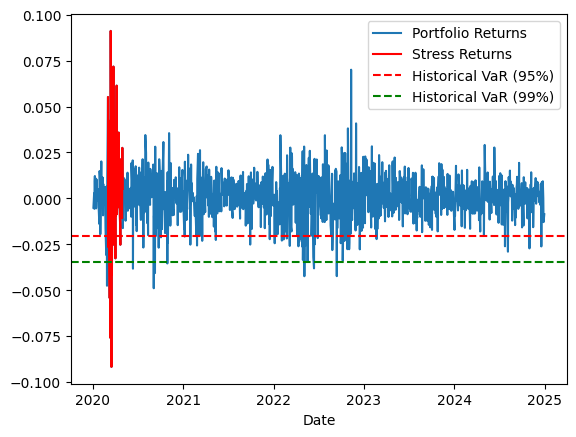

In [30]:
plt.xlabel("Date")
plt.plot(portfolioreturns,label="Portfolio Returns")
plt.plot(portfolioreturns.loc["2020-03-01":"2020-04-30"],color="red",label="Stress Returns")
#plt.plot(simulatedreturns,label="Simulated Returns")
#plt.plot(stressreturns)
plt.axhline(-var1,linestyle="--",color="red",label="Historical VaR (95%)")
plt.axhline(-var2,linestyle="--",color="green",label="Historical VaR (99%)")
plt.legend()

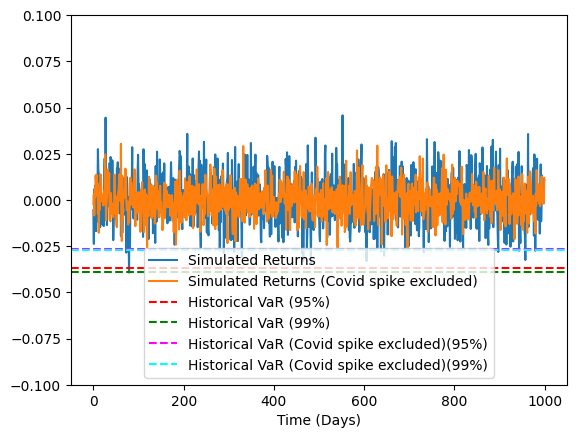

In [57]:
plt.xlabel("Time (Days)")
plt.ylim(-0.1,0.1)
#plt.plot(portfolioreturns,label="Portfolio Returns")
plt.plot(simulatedreturns,label="Simulated Returns")
plt.plot(simulatedreturns2,label="Simulated Returns (Covid spike excluded)")
#plt.plot(stressreturns)
plt.axhline(-var1c,linestyle="--",color="red",label="Historical VaR (95%)")
plt.axhline(-var2c,linestyle="--",color="green",label="Historical VaR (99%)")
plt.axhline(-var1c2,linestyle="--",color="magenta",label="Historical VaR (Covid spike excluded)(95%)")
plt.axhline(-var2c2,linestyle="--",color="cyan",label="Historical VaR (Covid spike excluded)(99%)")
plt.legend()

In [55]:
# Stress testing
#1. Calculate total loss during stress period (COVID crash)
stressreturns=returns.loc["2020-03-01":"2020-04-30"]
stress_portfolioreturns=stressreturns.dot(weights)
totalloss=stress_portfolioreturns.cumsum().iloc[-1]
print(f"Cumulative returns during stressful period (COVID crash):{totalloss:.2%}(i.e. gain)")
print("Reason: Recovery of all stocks after initial loss")
#2. Calculate total loss due to a hypothetical shock resulting in a 10% decrease
#in all portfolio assets
shock=np.array([-0.1, -0.1, -0.1, -0.1])
totalloss2=-shock.dot(weights)
print(f"Cumulative loss due to hypothetical shock:{totalloss2:.2%}")

Cumulative returns during stressful period (COVID crash):10.94%(i.e. gain)
Reason: Recovery of all stocks after initial loss
Cumulative loss due to hypothetical shock:10.00%


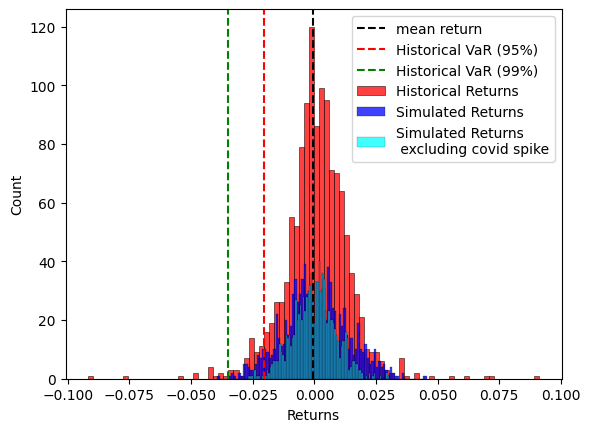

In [69]:
sns.histplot(portfolioreturns,bins=90,kde=False,color="red",label="Historical Returns")
sns.histplot(simulatedreturns,bins=90,kde=False,color="blue",label="Simulated Returns")
sns.histplot(simulatedreturns2,bins=90,kde=False,color="cyan",label="Simulated Returns\n excluding covid spike")

sns.histplot(simulatedreturns2,bins=90,kde=False)
#sns.histplot(portfolioreturns,bins=90,kde=True)
plt.xlabel("Returns")

#sns.histplot(stressreturns,bins=20,kde=False)
plt.axvline(-mu,linestyle="--",color="black",label="mean return")

plt.axvline(-var1,linestyle="--",color="red",label="Historical VaR (95%)")
plt.axvline(-var2,linestyle="--",color="green",label="Historical VaR (99%)")
plt.legend()

<Axes: xlabel='Returns during COVID spike', ylabel='Count'>

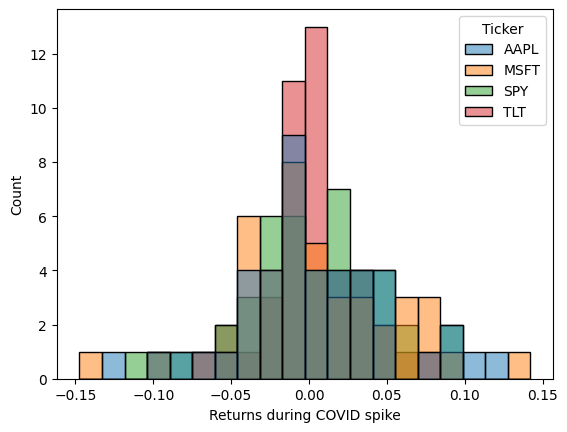

In [70]:
##sns.histplot(portfolioreturns,bins=90,kde=False)
#sns.histplot(simulatedreturns,bins=90,kde=False)
#sns.histplot(portfolioreturns,bins=90,kde=True)
plt.xlabel("Returns during COVID spike")
sns.histplot(stressreturns,bins=20,kde=False)
print("There is clearly more area on the positive side than on the negative. Thus cumulated returns are positive.")
#cumulative = stressreturns.iloc[:, 1] + stressreturns.iloc[:, 2] + stressreturns.iloc[:, 3]
#sns.histplot(cumulative,bins=90,kde=False)
#plt.axvline(-var1,linestyle="--",color="red",label="Historical VaR (95%)")
#plt.axvline(-var2,linestyle="--",color="green",label="Historical VaR (99%)")

In [ ]:
# Step 8: Conclusions:

# 1. "The 1-day 95% Historical VaR of this portfolio is -2.05%, meaning that on 95% of days, 
#we do not expect to lose more than 2.05%. Similarly, 98% Historical VaR of this portfolio is -2.05%

# 2.During the COVID-19 crash, the portfolio experienced 
#a cumulative loss of Y%, exceeding the VaR threshold. This shows why stress testing is 
#important in addition to VaR."

In [ ]:
#NEXT PART (COMING SOON): Calculate portfolio distribution(s) that minimize VaR